In [30]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

In [31]:
#Bring in the global space launches csv
resource_dir = os.path.join('.','resources')
df = pd.read_csv(os.path.join(f'{resource_dir}','global_space_launches.csv'))
df.head()

,Company Name,Location,Detail,Status Rocket,Rocket,Status Mission,Country of Launch,Companys Country of Origin,Private or State Run,DateTime,Year,Month,Day,Date,Time
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,USA,USA,P,2020-08-07 05:12:00+00:00,2020,8,7,07/08/2020,05:12
1,CASIC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China,China,S,2020-08-06 04:01:00+00:00,2020,8,6,06/08/2020,04:01
2,SpaceX,"Pad A, Boca Chica, Texas, USA",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,USA,USA,P,2020-08-04 23:57:00+00:00,2020,8,4,04/08/2020,23:57
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,Kazakhstan,Russia,S,2020-07-30 21:25:00+00:00,2020,7,30,30/07/2020,21:25
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",Atlas V 541 | Perseverance,StatusActive,145.0,Success,USA,USA,P,2020-07-30 11:50:00+00:00,2020,7,30,30/07/2020,11:50


In [32]:
#Grab all the privatized launches
private_df = df.loc[df['Private or State Run'] == 'P']
private_df.head()

,Company Name,Location,Detail,Status Rocket,Rocket,Status Mission,Country of Launch,Companys Country of Origin,Private or State Run,DateTime,Year,Month,Day,Date,Time
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,USA,USA,P,2020-08-07 05:12:00+00:00,2020,8,7,07/08/2020,05:12
2,SpaceX,"Pad A, Boca Chica, Texas, USA",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,USA,USA,P,2020-08-04 23:57:00+00:00,2020,8,4,04/08/2020,23:57
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",Atlas V 541 | Perseverance,StatusActive,145.0,Success,USA,USA,P,2020-07-30 11:50:00+00:00,2020,7,30,30/07/2020,11:50
8,SpaceX,"SLC-40, Cape Canaveral AFS, Florida, USA",Falcon 9 Block 5 | ANASIS-II,StatusActive,50.0,Success,USA,USA,P,2020-07-20 21:30:00+00:00,2020,7,20,20/07/2020,21:30
10,Northrop,"LP-0B, Wallops Flight Facility, Virginia, USA",Minotaur IV | NROL-129,StatusActive,46.0,Success,USA,USA,P,2020-07-15 13:46:00+00:00,2020,7,15,15/07/2020,13:46


In [33]:
countries = df["Companys Country of Origin"].unique()
years = df["Year"].unique().tolist()
years.reverse()

In [34]:
countries_dict = {"Year":years}
for country in countries:
    countries_dict[country] = []
    for year in years:
        countries_dict[country].append(len(private_df.loc[(df["Year"] == year) & (private_df["Companys Country of Origin"] == country)]))

country_df = pd.DataFrame(countries_dict)
country_df

,Year,USA,China,Russia,Japan,Isreal,Iran,Multi,India,Germany,North Korea,South Korea,Brazil,Ukraine,Italy,France,England,Arme de l'Air
0,1957,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1958,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1959,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1960,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1961,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,2016,29,0,0,3,0,0,11,0,0,0,0,0,0,0,0,0,0
60,2017,33,0,0,6,0,0,12,0,0,0,0,0,0,0,0,0,0
61,2018,37,1,0,4,0,0,11,0,0,0,0,0,0,0,0,0,0
62,2019,34,2,0,1,0,0,9,0,0,0,0,0,0,0,0,0,0


In [35]:
#This way of removing 0 columns is about half the speed of the alternative but is easier to read
zero_cols = [ col for col, is_zero in ((country_df == 0).sum() == country_df.shape[0]).items() if is_zero ]
country_df.drop(zero_cols, axis=1, inplace=True)
country_df

,Year,USA,China,Japan,Multi
0,1957,0,0,0,0
1,1958,0,0,0,0
2,1959,1,0,0,0
3,1960,5,0,0,0
4,1961,8,0,0,0
...,...,...,...,...,...
59,2016,29,0,3,11
60,2017,33,0,6,12
61,2018,37,1,4,11
62,2019,34,2,1,9


In [36]:
usa_list = country_df['USA']
china_list = country_df['China']
japan_list = country_df['Japan']
multi_list = country_df['Multi']

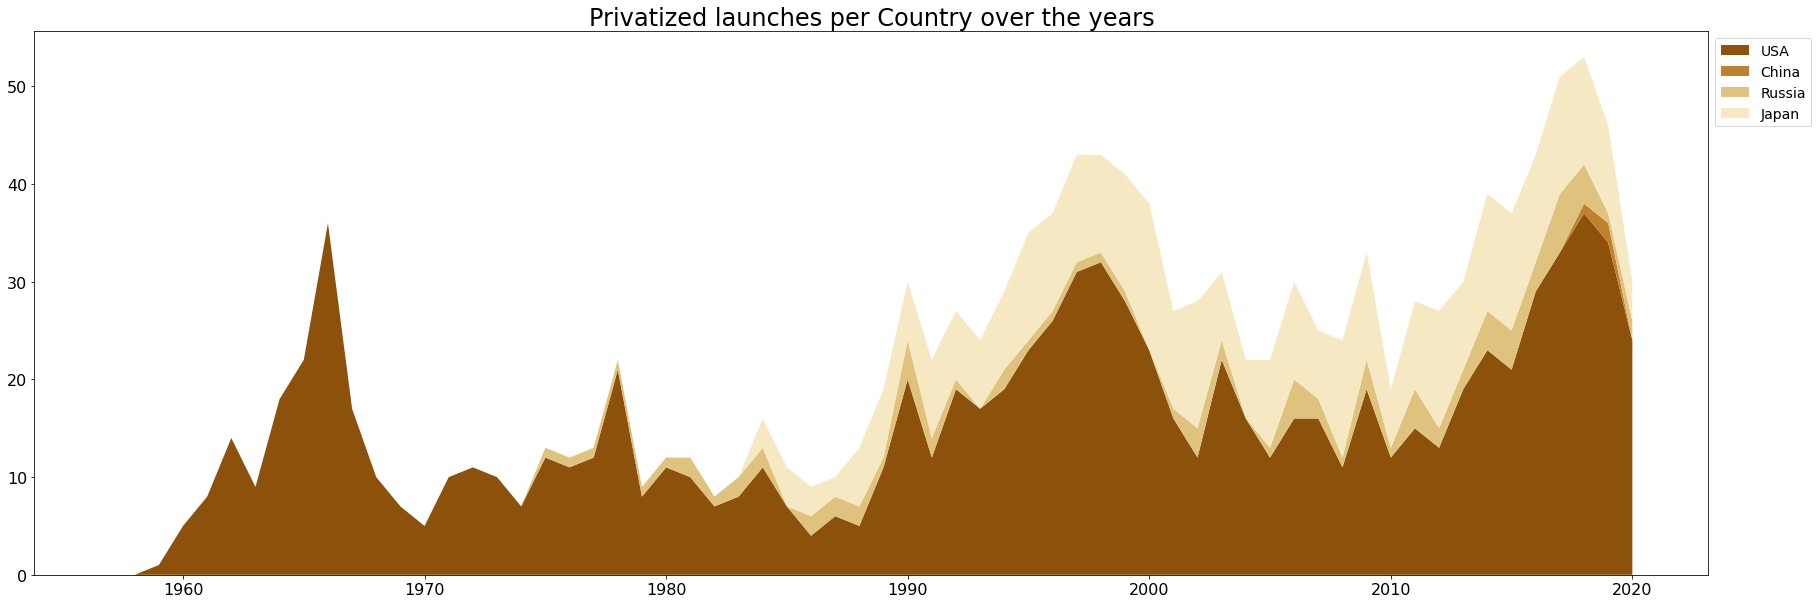

In [38]:
plt.stackplot(years,usa_list,china_list,japan_list,multi_list)
plt.rcParams["figure.figsize"] = (30,10)
plt.style.use('./resources/space-cadets.mplstyle')
plt.title('Privatized launches per Country over the years')
plt.legend(labels=countries,bbox_to_anchor=(1, 1), loc='upper left')
#plt.ylim(0,120)
plt.savefig(f'./output/alejandro/privatized_countries')